In [1]:
import matplotlib.pyplot as plt
import powerlaw
import matplotlib.pyplot as plt
import powerlaw
from powerlaw import plot_pdf, Fit
import json
import figures_functions
import  numpy as np
import pandas as pd


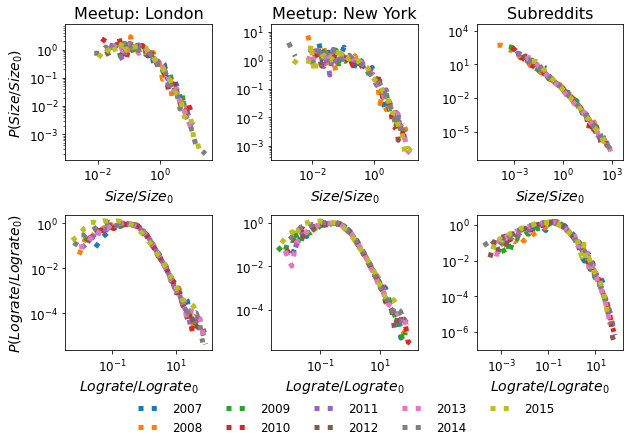

In [2]:
data= {}

communities = ["cityLondon", "cityNY", "reddit2017"]

for params in ["sizes", "logrates"]:
    data[params]={}
    for comm in communities:
        file = "Results/data/%s/%s_%s_normed_per_year.json"%(comm, comm, params)
        data[params][comm] = json.load(open(file))
        
colors_dict = {"2007":"#003f5c", "2008":"#2f4b7c", "2009":"#665191", "2010":"#a05195", "2011":"#d45087",
               "2012":"#f95d6a", "2013":"#ef5675", "2014":"#ff7c43", "2015":"#ffa600"}
        
figures_functions.plot_sizes_rates_in_row(data, 2007, 2015, colors_dict)
plt.savefig("Fig1.png", dpi=300, bbox_inches="tight")

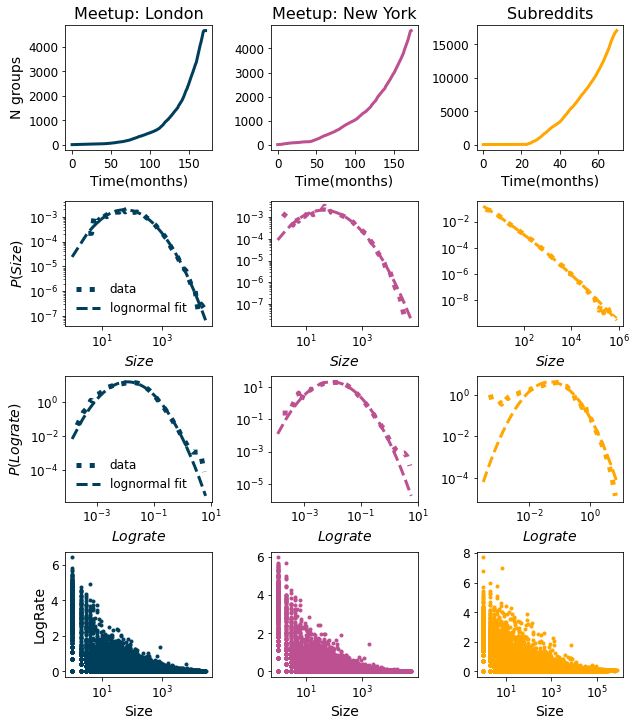

In [3]:
communities = ["cityLondon", "cityNY", "reddit2012"]
data_dict={}

params="Ngroups"

data_dict[params]={}
for category in communities:
    ts = pd.read_csv("./Results/data/%s/%s_ts.csv"%(category, category))
    data_dict[params][category]=ts["total_groups"][:173]
#for params in ["Ngroups", "p_sizes", "p_logrates", "rate_size"]:
params="p_sizes"
data_dict[params]={}
for category in communities:
    data = np.loadtxt("./Results/data/%s/%s_sizes.txt"%(category, category))
    data_dict[params][category]=data
    
params="p_logrates"

data_dict[params]={}
for category in communities:
    data = np.loadtxt("./Results/data/%s/%s_logrates.txt"%(category, category))
    data_dict[params][category]=data

params = "rate_size"
data_dict[params]={}
for category in communities:
    data = np.loadtxt("Results/data/%s/%s_sizes_rates.txt"%(category, category))
    data_dict[params][category]=data
    
    
color_dict = {"cityLondon": "#003f5c", 
              "cityNY": "#bc5090",
              "reddit2012":"#ffa600"}
figures_functions.plot_statistics_row(data_dict, color_dict)
plt.savefig("Fig2.png", dpi=300, bbox_inches='tight')


In [4]:
import functions_distance as f
import numpy as np
from powerlaw import plot_pdf
import matplotlib.pyplot as plt
color_dict = {"cityLondon": "#003f5c", 
              "cityNY": "#bc5090",
              "reddit2012":"#ffa600"}

communities_params = [["cityLondon", 0.05, 0.003, 0.5], ["cityNY", 0.05, 0.003, 0.4], ["reddit2012", 0.1, 0.003, 0.8]]
data_dict = {}

#param="sizes_data"
#data_dict[param] = {}
#for category, _,_, _ in communities_params:
#    data_dict[param][category] = f.norm_data(np.loadtxt("Results/data/%s/%s_sizes.txt"%(category, category)))
    
#param="logrates_data"
#data_dict[param] = {}
#for category, _, _, _ in communities_params:
#    data_dict[param][category] = f.norm_data(np.loadtxt("Results/data/%s/%s_logrates.txt"%(category, category)))
    
#param = "sizes_model"
#data_dict[param]={}

#for category, pa, pg, paff in communities_params:
#    data_dict[param][category] = [f.norm_data(np.loadtxt("Results/model/%s/sizes_%s_pactive%s_pnewgroup%s_paff%s_psample1.0_random.txt"%(category, category,pa, pg, paff,))),
#                            (pa, pg, paff)]
    
    
#param = "logrates_model"
#data_dict[param]={}

#for category, pa, pg, paff in communities_params:
#    data_dict[param][category] = [f.norm_data(np.loadtxt("Results/model/%s/logrates_%s_pactive%s_pnewgroup%s_paff%s_psample1.0_random.txt"%(category, category,pa, pg, paff,))),
#                            (pa, pg, paff)]

param = "newusers"
data_dict[param]={}

for category, pa, pg, paff in communities_params:
    ts = pd.read_csv("./Results/data/%s/%s_ts.csv"%(category, category))

    data_dict[param][category] = ts["new_users"][:173]

param = "oldusers_totalusers"
data_dict[param]={}

for category, pa, pg, paff in communities_params:
    ts = pd.read_csv("./Results/data/%s/%s_ts.csv"%(category, category))

    data_dict[param][category] = ts["old_users"][:173]/ts["total_users"][:173]
    
param = "newgroups_activeusers"
data_dict[param]={}

for category, pa, pg, paff in communities_params:
    ts = pd.read_csv("./Results/data/%s/%s_ts.csv"%(category, category))

    data_dict[param][category] = ts["new_groups"][:173]/ts["active_users"][:173]
    


0.002708650753343491
0.0027352060087700255
0.0029791323448654585


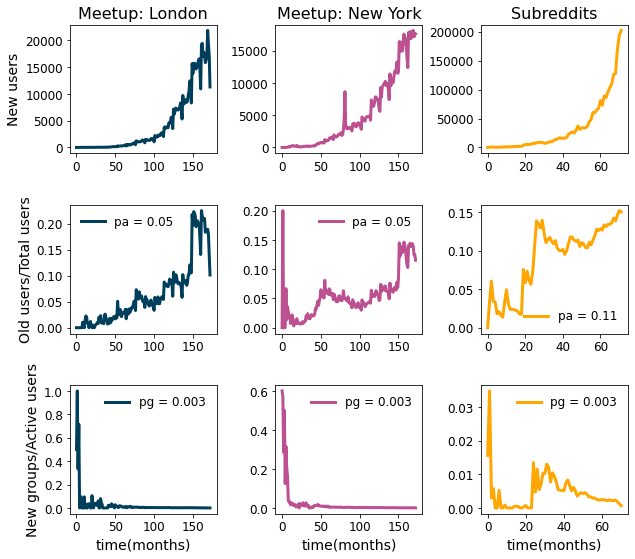

In [5]:
figures_functions.plot_time_series(data_dict, color_dict)
plt.savefig("Fig3.png", dpi=300, bbox_inches='tight')

(-0.5, 2617.5, 1877.5, -0.5)

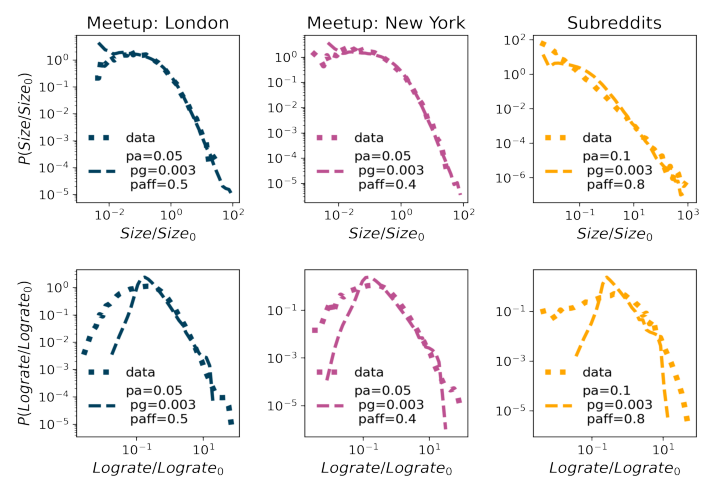

In [9]:
#figures_functions.plot_model_and_data_row(data_dict, color_dict)
#plt.savefig("Fig4.png", dpi=300, bbox_inches='tight')
import matplotlib.image as mpimg
img = mpimg.imread('Fig4.png')
plt.figure(figsize = (10,7), dpi=90)
plt.imshow(img, aspect='auto')
plt.axis('off')